In [ ]:
                                        LGBM & XGBM ASSIGNMENT

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import lightgbm as lgb
import xgboost as xgb

In [55]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")
   

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

train_df.head()


Train shape: (891, 12)
Test shape : (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [57]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [58]:
#3. Exploratory Data Analysis (EDA)
print("\nSummary Statistics:\n", train_df.describe(include="all"))
print("\nSummary Statistics:\n", test_df.describe(include="all"))



Summary Statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parc

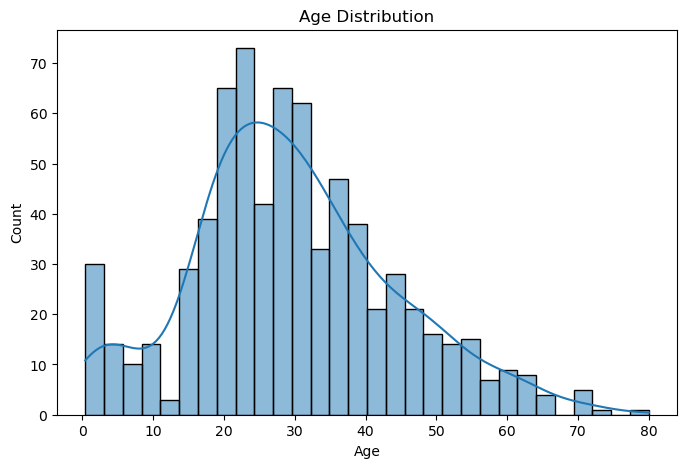

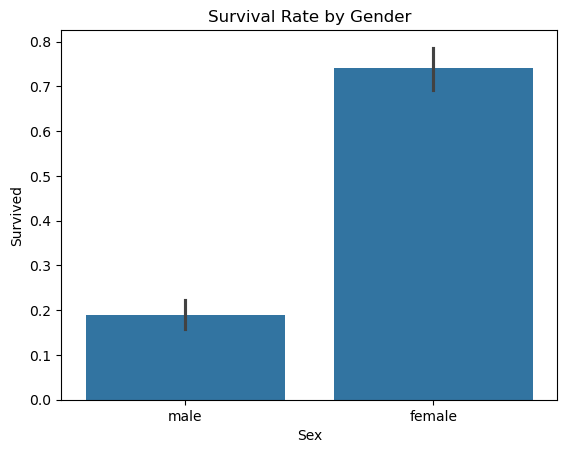

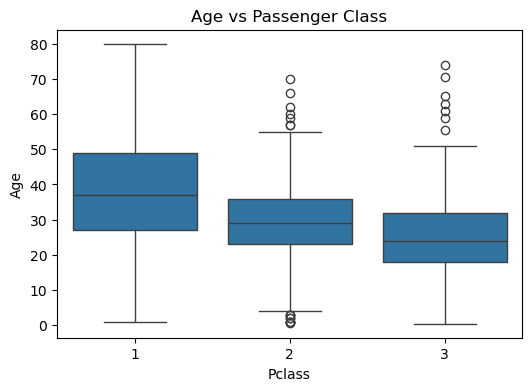

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Survival by Sex
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title("Age vs Passenger Class")
plt.show()


In [60]:
#data preprocessing
print("Missing values in train:\n", train_df.isnull().sum())

Missing values in train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [61]:
print("Missing values in train:\n", test_df.isnull().sum())

Missing values in train:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [44]:
from sklearn.model_selection import train_test_split

# Assuming 'Survived' is the target column
target_col = 'Survived'

# Split features and target
X = train_processed.drop(target_col, axis=1)
y = train_processed[target_col]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# For test dataset (no target column)
X_test = test_processed.copy()  # all columns are features

# Check shapes
print("X_train shape:", X_train.shape)
print("X_val shape  :", X_val.shape)
print("X_test shape :", X_test.shape)


X_train shape: (712, 8)
X_val shape  : (179, 8)
X_test shape : (418, 8)


In [72]:
import pandas as pd
train_df = pd.read_csv("Titanic_train.csv")
test_df  = pd.read_csv("Titanic_test.csv")
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)
train_df.head()
#  Preprocessing
def preprocess_titanic(df):
    """
    Preprocess Titanic dataset:
    1. Impute missing values
    2. Encode categorical variables using one-hot encoding
    3. Drop irrelevant columns
    """
    df = df.copy()  
 #  missing values
    if 'Age' in df.columns:
        df['Age'] = df['Age'].fillna(df['Age'].median())
    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    if 'Embarked' in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # Drop
    drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    for col in drop_cols:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

    # Encode categorical variables
    cat_cols = ['Sex', 'Embarked']
    df = pd.get_dummies(df, columns=[c for c in cat_cols if c in df.columns], drop_first=True)

    return df
train_processed = preprocess_titanic(train_df)
test_processed  = preprocess_titanic(test_df)

print("Processed train shape:", train_processed.shape)
print("Processed test shape :", test_processed.shape)
train_processed.head()


Train shape: (891, 12)
Test shape : (418, 11)
Processed train shape: (891, 9)
Processed test shape : (418, 8)


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [73]:
# building predictive model
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metric='logloss'  
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
# 5. Evaluate
def evaluate_model(y_true, y_pred, model_name):
    print(f"---{model_name} Evaluation---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("------------------------\n")
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted')
    }
results = {}
results['XGBoost'] = evaluate_model(y_val, y_pred_xgb, "XGBoost")


---XGBoost Evaluation---
Accuracy: 0.7932960893854749
Precision: 0.7936561142147736
Recall: 0.7932960893854749
F1 Score: 0.7872891257142691
------------------------



         accuracy  precision    recall        f1
XGBoost  0.793296   0.793656  0.793296  0.787289


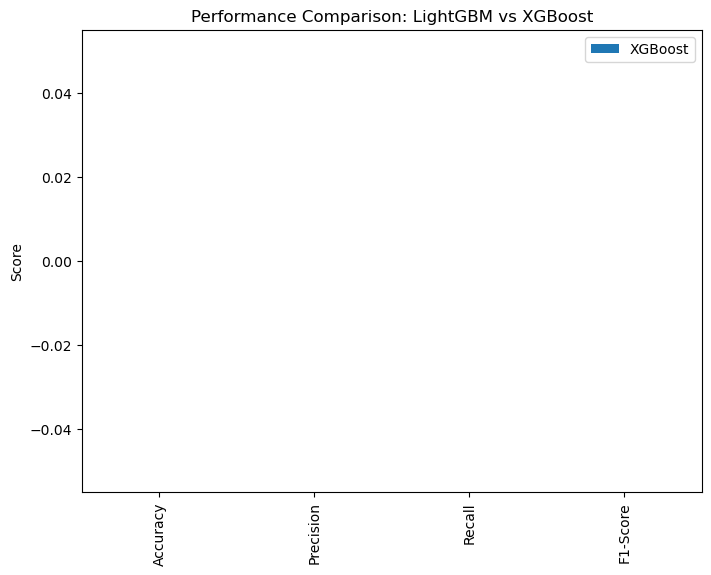

           XGBoost
Accuracy       NaN
Precision      NaN
Recall         NaN
F1-Score       NaN


In [76]:

results_df = pd.DataFrame(results).T
print(results_df)
# Convert results to DataFrame
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
metrics_df.plot(kind='bar', figsize=(8,6))
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.show()

print(metrics_df)


In [80]:
# comparative analysis
#  Imports 
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

#  Function to evaluate models 
def evaluate_model(y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-score': f1_score(y_true, y_pred, average='weighted')
    }
    return metrics

#  Train LightGBM 
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_val)

# Train XGBoost 
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


          Accuracy  Precision    Recall  F1-score
LightGBM  0.782123   0.779693  0.782123  0.778804
XGBoost   0.793296   0.793656  0.793296  0.787289


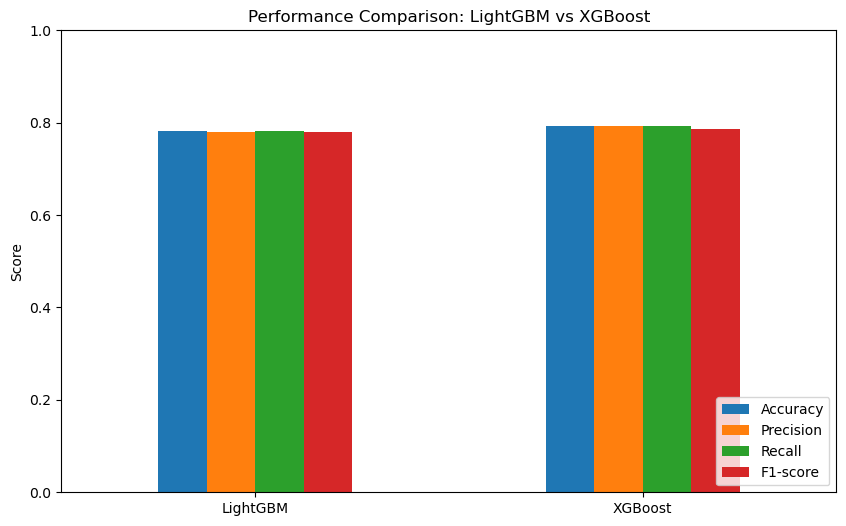

In [79]:

# Evaluate 
results = {}
results['LightGBM'] = evaluate_model(y_val, y_pred_lgb)
results['XGBoost']  = evaluate_model(y_val, y_pred_xgb)
results_df = pd.DataFrame(results).T  # transpose for readability
print(results_df)

#  Visualization 
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()
